In [118]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [119]:
def format_millions (x, pos):
    return f'{x/1_000_000:.1f}M'

In [120]:
def format_number(num):
    if num >= 1_000_000:
        return f'{num / 1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num / 1_000:.0f}K'
    else:
        return str(num)

In [121]:
# Load dataset
df = pd.read_csv('Amazon Sales data.csv')

In [122]:
# Preview first rows of the dataset
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [123]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [124]:
# Summary statistics
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [125]:
# Convert date columns to datetime format and sort by order date
df['Order Date'] = pd.to_datetime(df['Order Date'].str.replace('-','/'))
df['Ship Date'] = pd.to_datetime(df['Ship Date'].str.replace('-','/'))
df = df.sort_values('Order Date')

1-Which regions have the highest total sales revenue? 

In [126]:
df_region = df.pivot_table(
    index='Region',
    columns='Sales Channel',
    values='Total Revenue',
    aggfunc='sum'
)

df_region['sum'] = df_region['Offline'].fillna(0) + df_region['Online'].fillna(0)
df_region = df_region.rename_axis(columns=None).fillna(0).sort_values('sum',ascending=False).reset_index()
df_region

,Region,Offline,Online,sum
0,Sub-Saharan Africa,25733749.52,13938281.91,39672031.43
1,Europe,18122486.45,15246445.66,33368932.11
2,Asia,12146097.76,9200993.26,21347091.02
3,Australia and Oceania,4201867.85,9892397.28,14094265.13
4,Middle East and North Africa,4993138.88,9059567.70,14052706.58
5,Central America and the Caribbean,8254112.19,916273.30,9170385.49
6,North America,5643356.55,0.00,5643356.55


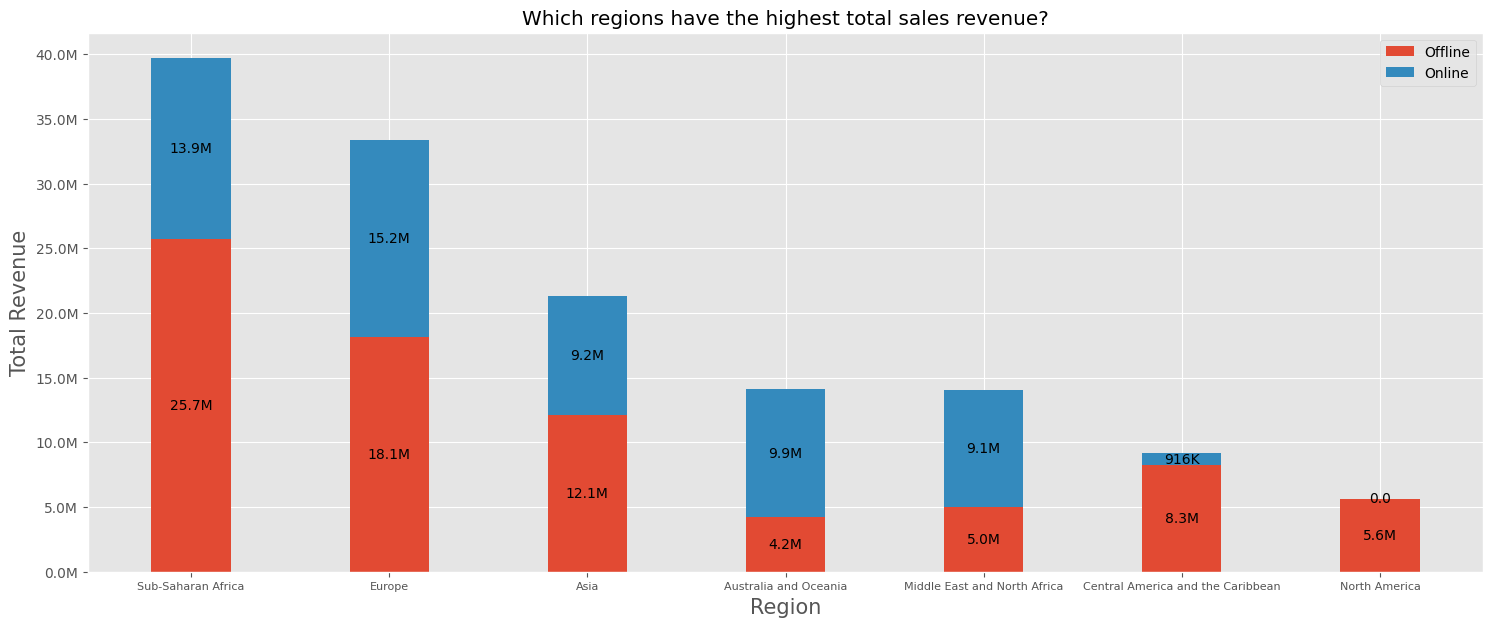

In [127]:
Region = ([r for r in df_region['Region']])

width = 0.4  

fig, ax = plt.subplots(figsize=(18, 7))
bottom = np.zeros(7)

p = ax.bar(Region, df_region['Offline'], width, label='Offline', bottom=bottom)
bottom += df_region['Offline']
ax.bar_label(p, labels=[format_number(val) for val in df_region['Offline']], label_type='center') 

p = ax.bar(Region, df_region['Online'], width, label='Online', bottom=bottom)
bottom += df_region['Online']
ax.bar_label(p, labels=[format_number(val) for val in df_region['Online']], label_type='center') 

ax.set_title('Which regions have the highest total sales revenue?')
plt.xticks(ha='center', fontsize=8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))
ax.set_xlabel('Region', fontsize=15)
ax.set_ylabel('Total Revenue', fontsize=15)
ax.legend()

plt.show()

2-What is the average unit price and unit cost for each type of product?

In [128]:
df_join = df.pivot_table(
    index='Item Type',
    values=['Unit Price', 'Unit Cost'], 
    aggfunc='mean'
).reset_index()
df_join

,Item Type,Unit Cost,Unit Price
0,Baby Food,159.42,255.28
1,Beverages,31.79,47.45
2,Cereal,117.11,205.70
3,Clothes,35.84,109.28
4,Cosmetics,263.33,437.20
5,Fruits,6.92,9.33
6,Household,502.54,668.27
7,Meat,364.69,421.89
8,Office Supplies,524.96,651.21
9,Personal Care,56.67,81.73


3-Which country has the highest total profit?

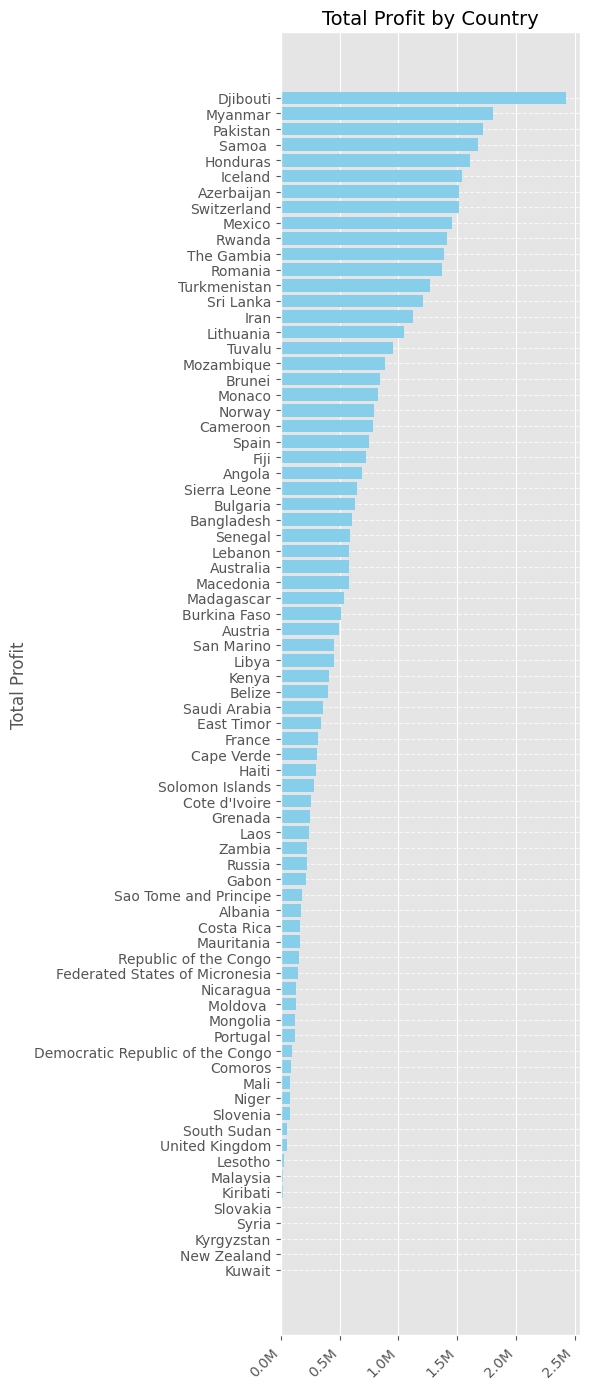

In [129]:
country_profit = df.groupby('Country')['Total Profit'].sum().sort_values(ascending=True)

plt.figure(figsize=(6, 14))
bars = plt.barh(country_profit.index, country_profit.values, color='skyblue')
plt.title('Total Profit by Country', fontsize=14)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_millions))
plt.tight_layout()
plt.show()

4- How does the sales channel affect the order priority distribution?

In [130]:
df_priorities = df.pivot_table(
    index='Order Priority',
    columns='Sales Channel',
    values='Order ID',
    aggfunc='count'
).rename_axis(columns=None).reset_index()

i1 = df_priorities.iloc[2]
i2 = df_priorities.iloc[3]
df_priorities.iloc[2] = i2
df_priorities.iloc[3] = i1
df_priorities

,Order Priority,Offline,Online
0,C,13,9
1,H,17,13
2,M,8,13
3,L,12,15


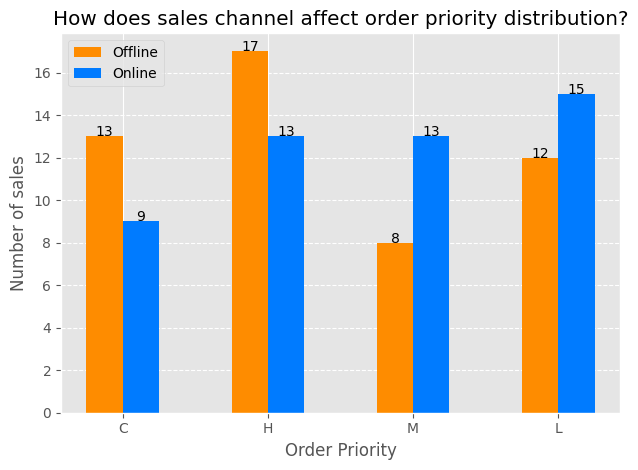

In [131]:
x = np.arange(len(df_priorities['Order Priority']))
width = 0.25
bar1 = plt.bar(x - 0.5*width, df_priorities['Offline'], width, label=_('Offline'), color="#fe8c00ff")
bar2 = plt.bar(x + 0.5*width, df_priorities['Online'], width, label=_('Online'), color="#007BFFFF")
plt.xticks(x, df_priorities['Order Priority'])
plt.title('How does sales channel affect order priority distribution?')
plt.xlabel('Order Priority')
plt.ylabel('Number of sales')
plt.legend()
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

5-What is the average order processing time (length of time between order date and shipment) for each sales channel?

In [132]:
df['Processing'] = df['Ship Date'] - df['Order Date']

avg_proces_year = df.groupby('Sales Channel')['Processing'].mean()
avg_proces_year = pd.DataFrame(avg_proces_year).reset_index()
avg_proces_year

,Sales Channel,Processing
0,Offline,23 days 04:48:00
1,Online,23 days 12:28:48


6-Which type of product has the highest and lowest total sales?

In [133]:
df_tottal_sales = df.groupby('Item Type')['Total Revenue'].sum()
df_tottal_sales.sort_values(ascending=False)

Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64

7-How does order priority differ in different regions?

In [134]:
df_region = df.pivot_table(
    index='Region',
    columns='Order Priority',
    values='Order ID',
    aggfunc='count'
).rename_axis(columns=None).reset_index().fillna(0)
df_region = df_region.sort_index(ascending=False)
df_region

,Region,C,H,L,M
6,Sub-Saharan Africa,8.0,11.0,9.0,8.0
5,North America,1.0,0.0,1.0,1.0
4,Middle East and North Africa,0.0,2.0,4.0,4.0
3,Europe,5.0,7.0,6.0,4.0
2,Central America and the Caribbean,2.0,2.0,2.0,1.0
1,Australia and Oceania,4.0,5.0,1.0,1.0
0,Asia,2.0,3.0,4.0,2.0


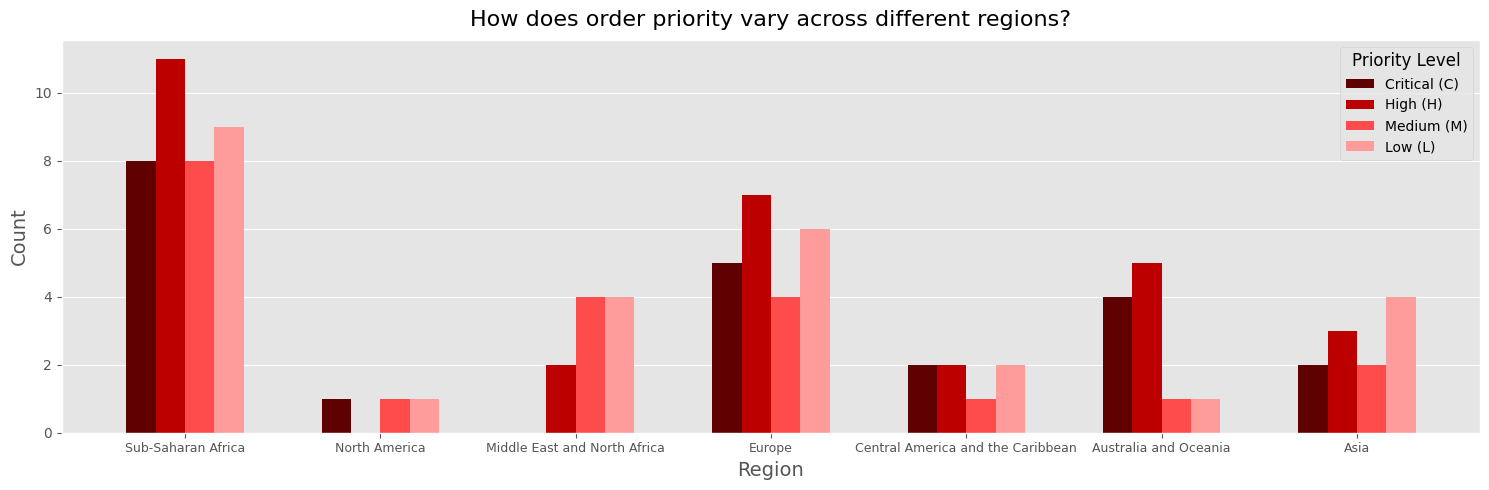

In [135]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')

x = np.arange(len(df_region.index))
width = 0.15

plt.bar(x - 1.5*width, df_region['C'], width, label='Critical (C)', color="#600101ff")
plt.bar(x - 0.5*width, df_region['H'], width, label='High (H)', color="#BC0000FF")
plt.bar(x + 0.5*width, df_region['M'], width, label='Medium (M)', color="#fe4c4cff")
plt.bar(x + 1.5*width, df_region['L'], width, label='Low (L)', color="#fe9b9bff")

# Appearance settings
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('How does order priority vary across different regions?', fontsize=16, pad=10)
plt.xticks(x, df_region['Region'], fontsize=9)
plt.legend(title='Priority Level', title_fontsize=12)
plt.grid(axis='x')
plt.tight_layout()

plt.show()

8-What is the correlation between unit price and total profit?

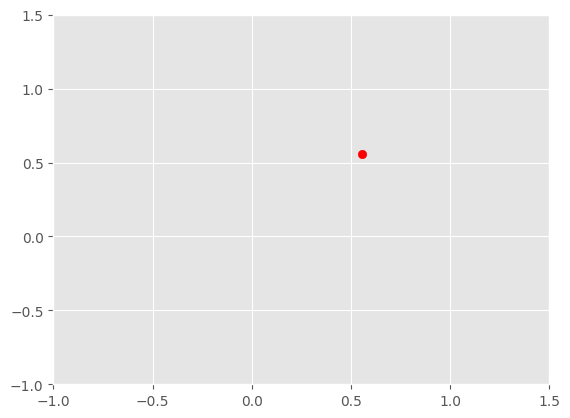

In [136]:
Unit_Price_Total_Profit_corr = df['Unit Price'].corr(df['Total Profit'])

plt.scatter(x=Unit_Price_Total_Profit_corr, y=Unit_Price_Total_Profit_corr, color='r')
plt.xticks(np.arange(-1,2,0.5))
plt.yticks(np.arange(-1,2,0.5))
plt.show()


9- Are there trends or seasonal patterns in the sales data?

In [137]:
df['month'] = df['Order Date'].dt.month

month_names= {1: 'JAN', 2: 'FEB', 3: 'MAR',
              4: 'APR', 5: 'MAY', 6: 'JUN',
              7: 'JUL', 8: 'AUG', 9: 'SEPT',
             10: 'OCT', 11: 'NOV',12: 'DEC'}

Monthly_sales  = df.groupby('month')['Total Revenue'].sum()
Monthly_sales.index = Monthly_sales.index.map(month_names)
Monthly_sales

month
JAN     10482467.12
FEB     24740517.77
MAR      2274823.87
APR     16187186.33
MAY     13215739.99
JUN      5230325.77
JUL     15669518.50
AUG      1128164.91
SEPT     5314762.56
OCT     15287576.61
NOV     20568222.76
DEC      7249462.12
Name: Total Revenue, dtype: float64

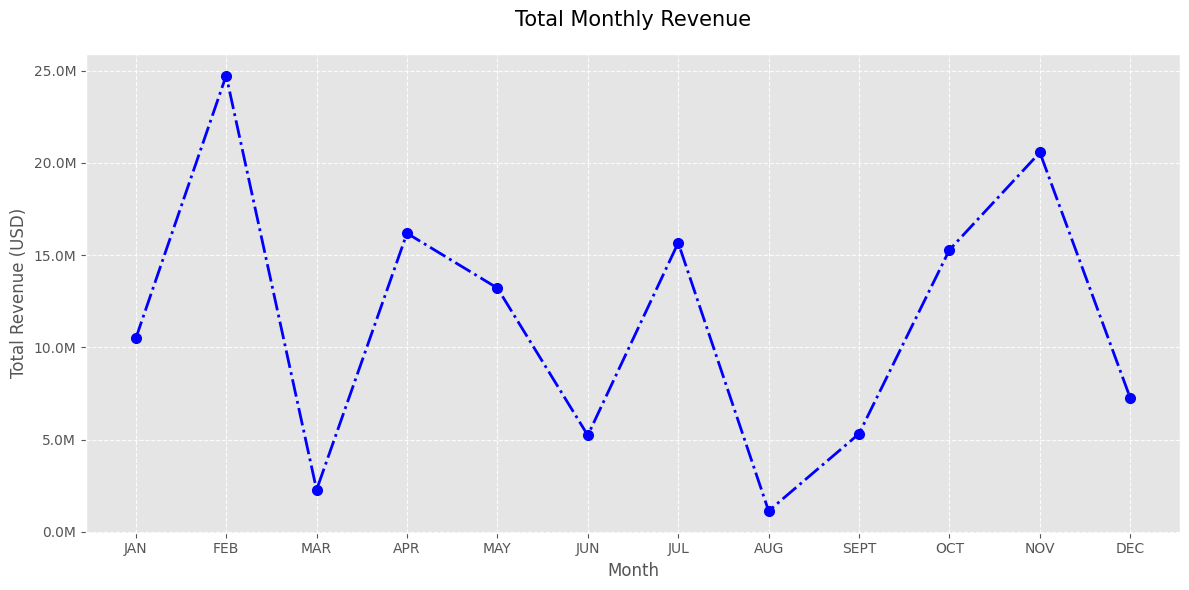

In [157]:
plt.figure(figsize=(12, 6)) 
plt.plot(Monthly_sales.index, Monthly_sales.values, marker='o', linestyle='-.', color='b', linewidth=2, markersize=7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))
plt.title('Total Monthly Revenue', fontsize=15, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.9)  

plt.tight_layout()
plt.show()

10-How does the number of units sold vary in different countries?

In [139]:
df_country_sales = df.groupby('Country')['Units Sold'].sum().sort_values()
df_country_sales

Country
Kyrgyzstan                 124
Slovakia                   171
United Kingdom             282
Kuwait                     522
Comoros                    962
                         ...  
Myanmar                  14180
The Gambia               14813
Mexico                   19143
Djibouti                 23198
Sao Tome and Principe    24568
Name: Units Sold, Length: 76, dtype: int64

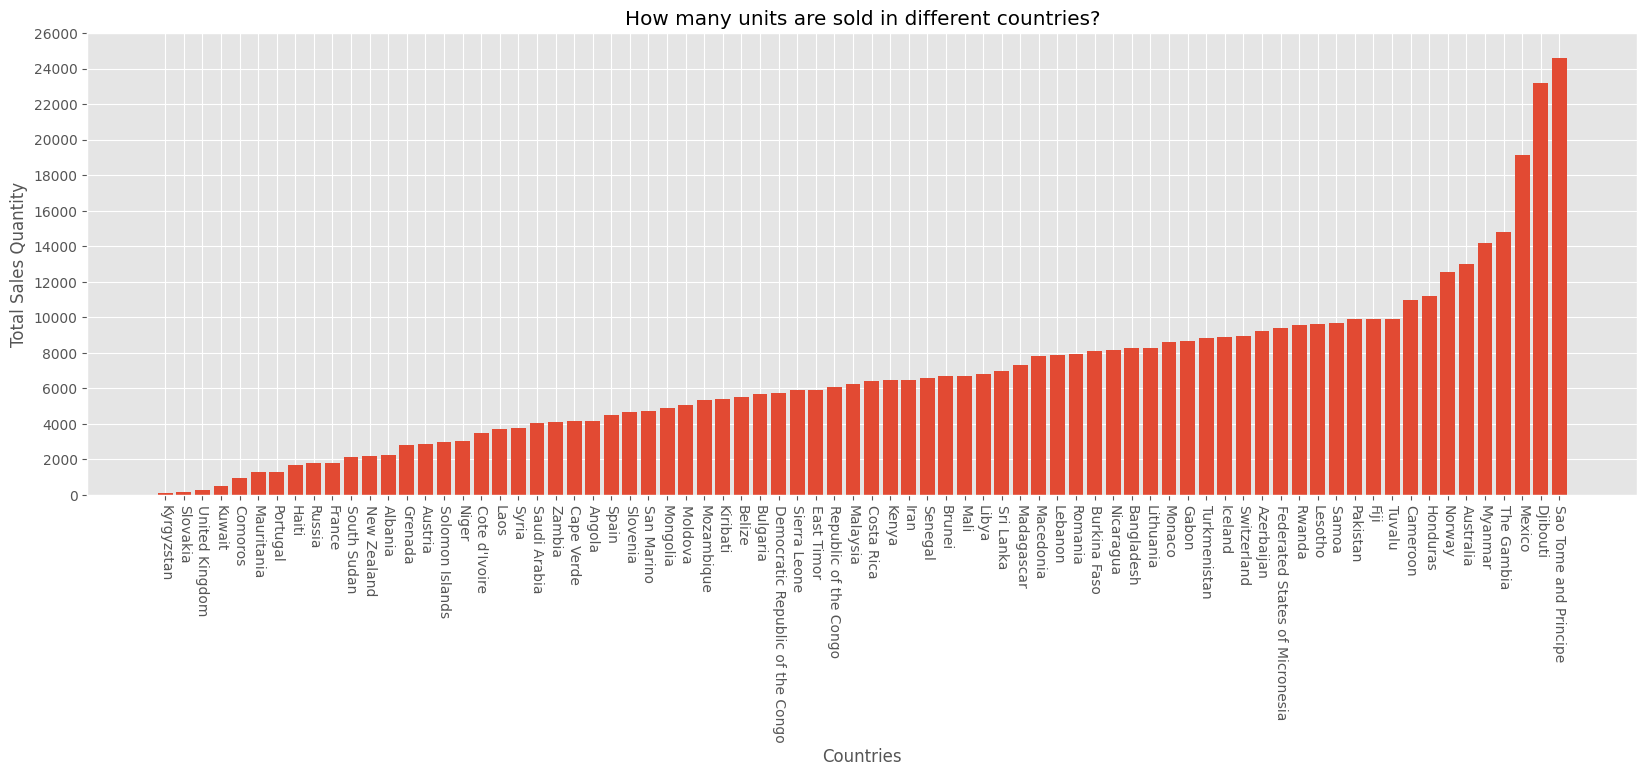

In [158]:
plt.figure(figsize=(20,6))
plt.bar(df_country_sales.index, df_country_sales.values)
plt.xticks(rotation=270)
plt.yticks(np.arange(0,26001,2000))
plt.title('How many units are sold in different countries?')
plt.xlabel('Countries')
plt.ylabel('Total Sales Quantity')
plt.show()

11- How does total sales revenue change in different countries?

In [141]:
country_total_sales = df.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False)
country_total_sales

Country
Honduras        6336545.48
Myanmar         6161257.90
Djibouti        6052890.86
Turkmenistan    5822036.20
Mexico          5643356.55
                   ...    
Syria             35304.72
Slovakia          26344.26
New Zealand       20404.71
Kyrgyzstan        19103.44
Kuwait             4870.26
Name: Total Revenue, Length: 76, dtype: float64

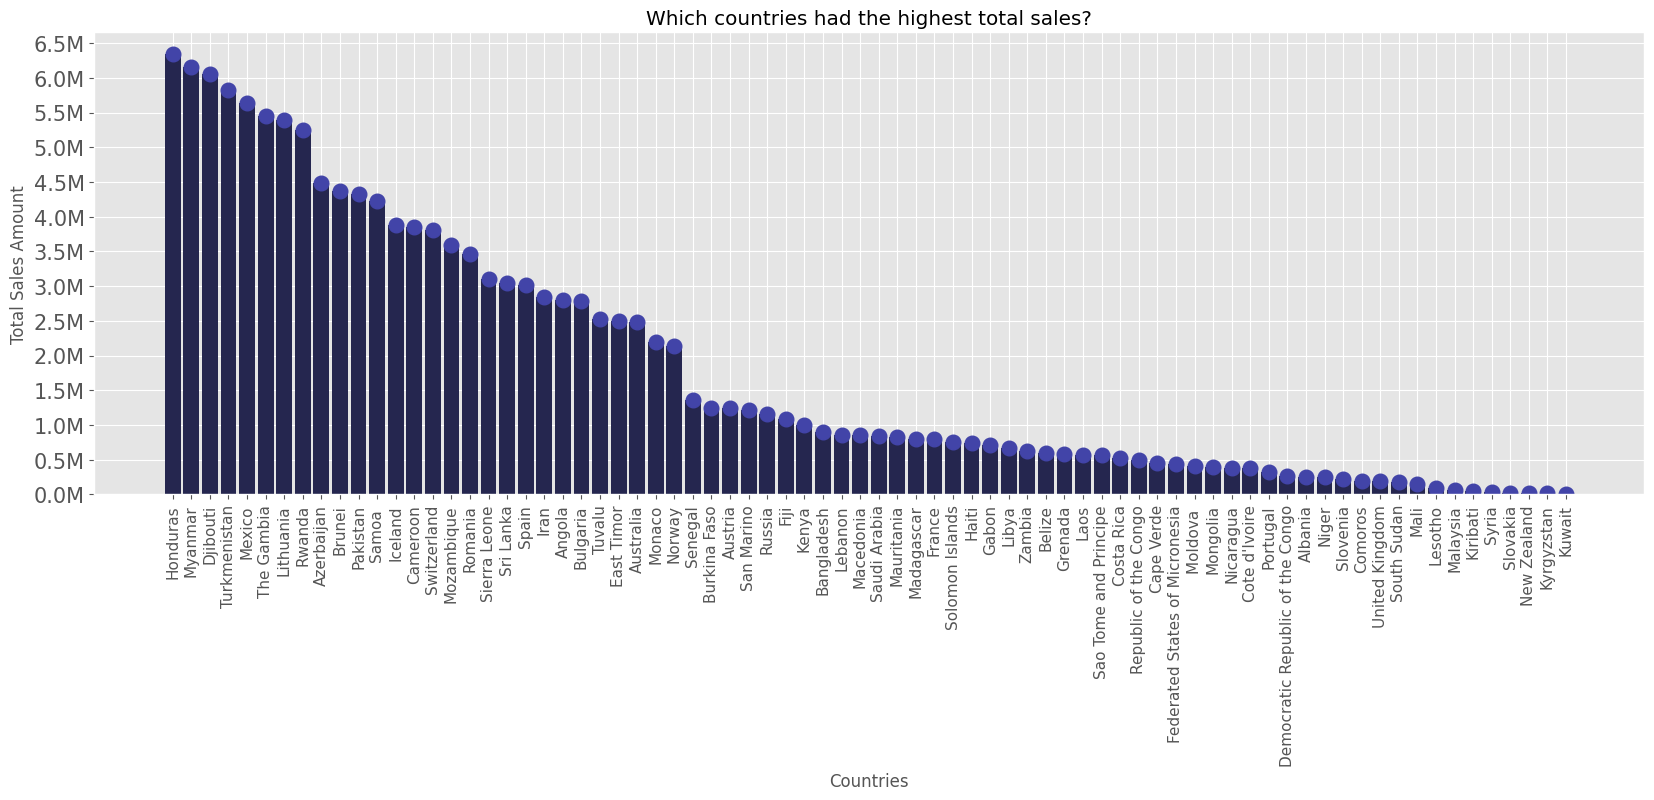

In [160]:
plt.figure(figsize=(20,6))
plt.bar(country_total_sales.index, country_total_sales.values, width=0.85, color="#25264F")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_millions))
plt.xticks(rotation=90, size=11)
plt.title('Which countries had the highest total sales?')
plt.xlabel('Countries')
plt.ylabel('Total Sales Amount')
plt.plot(country_total_sales.index, country_total_sales.values, marker='.', linestyle=' ', color="#4244A8", markersize=21)
plt.yticks(np.arange(0,6500001,500000), size=15)
plt.show()

12- What is the distribution of unit prices for each type of product?

In [143]:
df.groupby('Item Type')['Unit Price'].mean()

Item Type
Baby Food          255.28
Beverages           47.45
Cereal             205.70
Clothes            109.28
Cosmetics          437.20
Fruits               9.33
Household          668.27
Meat               421.89
Office Supplies    651.21
Personal Care       81.73
Snacks             152.58
Vegetables         154.06
Name: Unit Price, dtype: float64

13-Which sales channel has the highest average unit price?

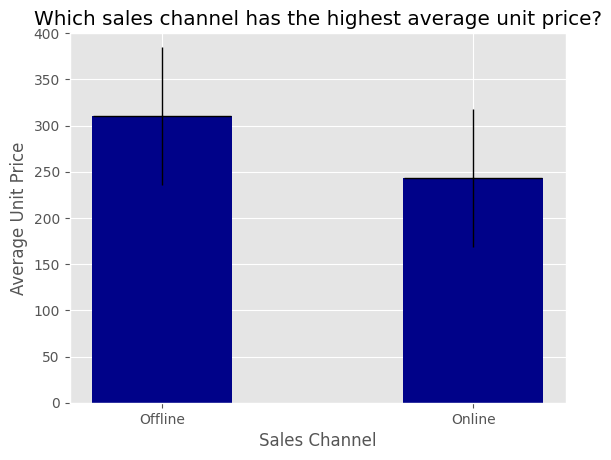

In [161]:
Sales_Channel_Ave_Pri = df.groupby('Sales Channel')['Unit Price'].mean()
x = Sales_Channel_Ave_Pri.index
y = Sales_Channel_Ave_Pri.values
plt.bar(x, y, width=0.45, color="#000289")
plt.plot(x, y, marker='+', linestyle=' ', markersize=100, color="#000000")
plt.yticks(np.arange(0,401,50))
plt.title('Which sales channel has the highest average unit price?')
plt.xlabel('Sales Channel')
plt.ylabel('Average Unit Price')
plt.show()

###

14-Are there any outliers in the total cost distribution?

In [183]:
x = df['Total Revenue']
q1 = np.percentile(x,25)
q3 = np.percentile(x,75)

iqr = q3 - q1

LB = q1 - 1.5 * iqr
UB = q3 + 1.5 * iqr

df[(LB > df['Total Revenue'] )|( df['Total Revenue'] > UB)] 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing,month,ave_total_Revenue
68,Europe,Lithuania,Office Supplies,Offline,H,2010-10-24,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,24 days,10,651.21
33,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,2015-03-01,8250,668.27,502.54,5513227.50,4145955.00,1367272.50,44 days,1,668.27
13,Central America and the Caribbean,Honduras,Household,Offline,H,2017-02-08,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,5 days,2,668.27


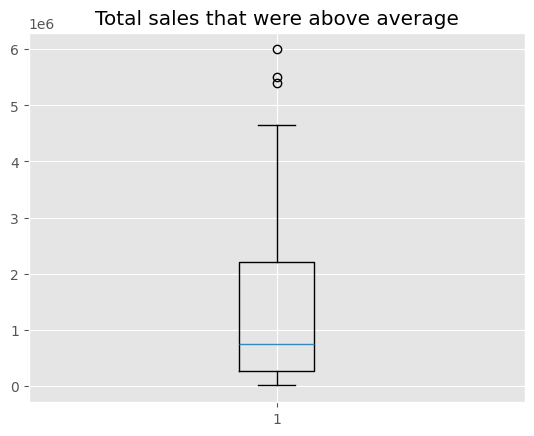

In [184]:
plt.boxplot(x)
plt.title('Total sales that were above average')
plt.show()

15-How does total profit change across different types of goods?

In [185]:
Items_total_profit = df.groupby('Item Type')['Total Profit'].sum().sort_values()
Items_count_sale = df.groupby('Item Type')['Units Sold'].sum().sort_values()
Items_Sales = pd.concat([Items_total_profit, Items_count_sale], axis=1).rename_axis(columns=None).reset_index()

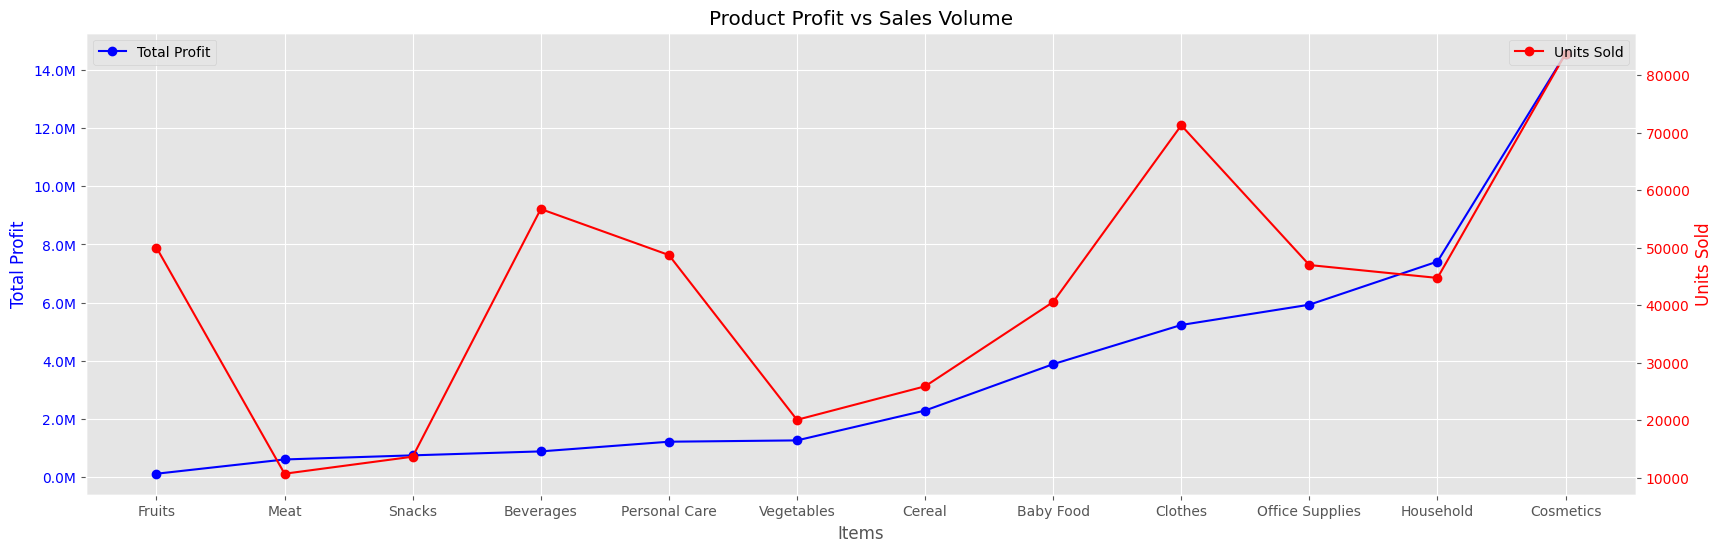

In [186]:
plt.figure(figsize=(20, 6))

ax1 = plt.gca()
ax1.plot(Items_Sales['Item Type'], Items_Sales['Total Profit'], color='blue', label=_('Total Profit'), marker='o')
ax1.set_xlabel(_('Items'))
ax1.set_ylabel(_('Total Profit'), color='blue')
ax1.yaxis.set_major_formatter(FuncFormatter(format_millions))
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(Items_Sales['Item Type'], Items_Sales['Units Sold'], color='red', label=_('Units Sold'), marker='o')
ax2.set_ylabel(_('Units Sold'), color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title(_('Product Profit vs Sales Volume'))
plt.grid()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

16-What is the average order processing time for each country?

In [187]:
country_Processing = df.groupby('Country')['Processing'].mean().sort_values(ascending=False)
country_Processing

Country
Democratic Republic of the Congo   50 days
Malaysia                           47 days
Bangladesh                         47 days
Belize                             44 days
Albania                            44 days
                                     ...  
Saudi Arabia                        3 days
Mauritania                          2 days
Gabon                               1 days
Zambia                              1 days
Iceland                             0 days
Name: Processing, Length: 76, dtype: timedelta64[ns]

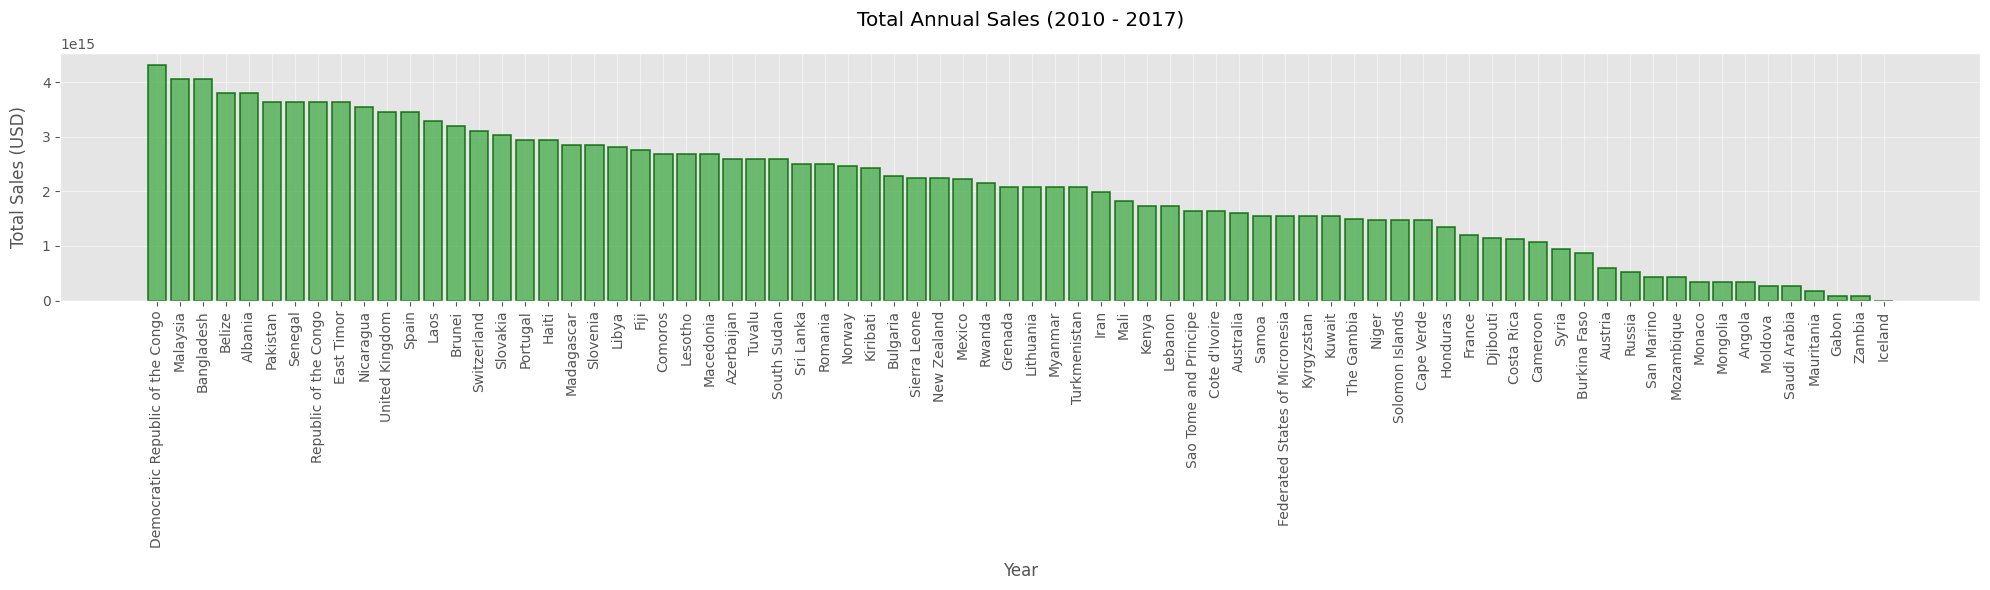

In [188]:
Country = country_Processing.index
Processing = country_Processing.values

plt.figure(figsize=(20, 6))
bars = plt.bar(Country, Processing, color='#4CAF50', edgecolor='darkgreen', linewidth=1.2, alpha=0.8)

plt.title(_('Total Annual Sales (2010 - 2017)'), pad=20)
plt.xlabel(_('Year'), labelpad=10)
plt.ylabel(_('Total Sales (USD)'), labelpad=10)
plt.xticks(Country, rotation=90)
plt.yticks()

plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

17-Which region has the highest average total revenue per order?

In [189]:
df['ave_total_Revenue'] = df['Total Revenue'] / df['Units Sold']
Region_ave_total_Revenue = df.groupby('Region')['ave_total_Revenue'].mean().sort_values(ascending=False)
Region_ave_total_Revenue

Region
Asia                                 335.809091
Europe                               328.979545
North America                        277.243333
Sub-Saharan Africa                   259.618889
Central America and the Caribbean    243.172857
Middle East and North Africa         241.506000
Australia and Oceania                222.672727
Name: ave_total_Revenue, dtype: float64

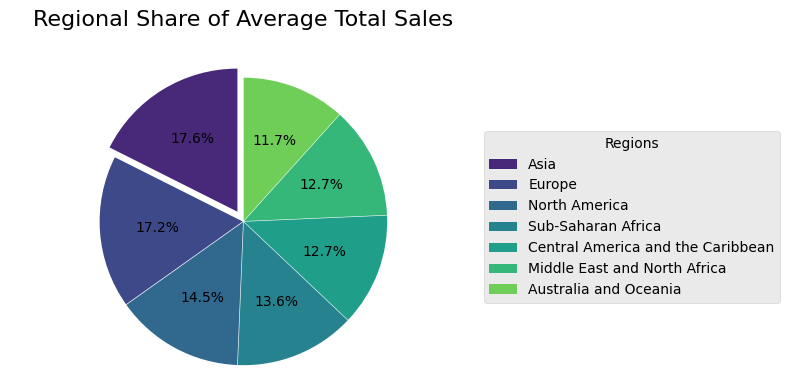

In [190]:
regions = Region_ave_total_Revenue.index
revenue = Region_ave_total_Revenue.values

explode = [0.08 if region == 'Asia' else 0.005 for region in regions]
colors = sns.color_palette("viridis", len(regions)+1)
plt.figure(figsize=(8, 4))
wedges, texts, autotexts = plt.pie(revenue, colors=colors,
                                   autopct='%1.1f%%', startangle=90,
                                   explode=explode,
                                   textprops={'fontsize': 10, 'color':"#000000"})
plt.title(_('Regional Share of Average Total Sales'), fontsize=16, pad=20)
plt.axis('equal')
plt.legend(wedges, regions, title=_("Regions"), loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

18-Is there a relationship between the number of units sold and total profit?

In [191]:
UnitsSold_TotalProfit_corr = df['Total Profit'].corr(df['Units Sold'])
print(f'The correlation between the Units Sold and total profit is : {UnitsSold_TotalProfit_corr}')

The correlation between the Units Sold and total profit is : 0.5645504620845976


19-How does order priority change based on product type?

In [192]:
item_order_priority_count = (df.pivot_table(
    index='Item Type',
    columns='Order Priority',
    values='Units Sold',
    aggfunc='count'
    )
    .rename_axis(columns=None)
    .fillna(0)
    .sort_values('C',ascending=False)
    .reset_index()
    [['Item Type', 'C', 'H', 'M', 'L']]
)

item_order_priority_count['sum'] = item_order_priority_count[['C', 'H', 'M', 'L']].sum(axis=1)
iopc = item_order_priority_count.sort_values('sum', ascending=False)

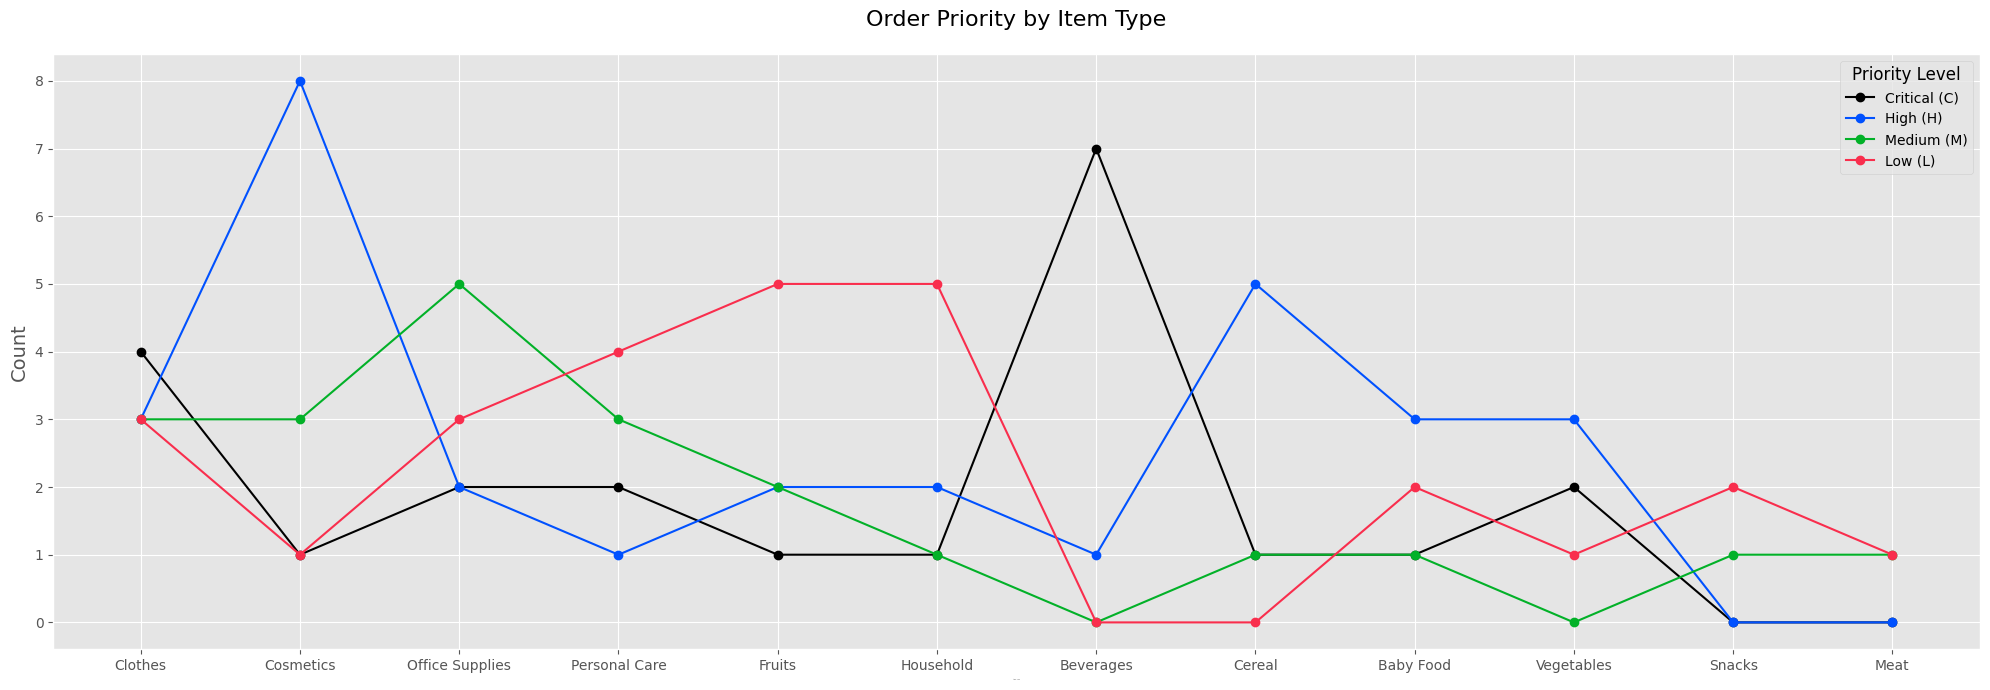

In [193]:
plt.figure(figsize=(20, 7))
plt.style.use('ggplot')

plt.plot(iopc['Item Type'], iopc['C'], label='Critical (C)', color="#000000ff", marker='o', markersize=6)
plt.plot(iopc['Item Type'], iopc['H'], label='High (H)', color="#0051FFFF", marker='o', markersize=6)
plt.plot(iopc['Item Type'], iopc['M'], label='Medium (M)', color="#02b128ff", marker='o', markersize=6)
plt.plot(iopc['Item Type'], iopc['L'], label='Low (L)', color="#f92e4dff", marker='o', markersize=6)
plt.xlabel('Item Type', fontsize=1)
plt.ylabel('Count', fontsize=14)
plt.title('Order Priority by Item Type', fontsize=16, pad=20)
plt.legend(title='Priority Level', title_fontsize=12)
plt.tight_layout()
plt.show()